Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4880 - accuracy: 0.4551 - val_loss: 1.2428 - val_accuracy: 0.5514
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1577 - accuracy: 0.5877 - val_loss: 1.1183 - val_accuracy: 0.6015
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0214 - accuracy: 0.6413 - val_loss: 1.0465 - val_accuracy: 0.6278
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9176 - accuracy: 0.6777 - val_loss: 0.9383 - val_accuracy: 0.6680
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8493 - accuracy: 0.7029 - val_loss: 0.9118 - val_accuracy: 0.6851
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7885 - accuracy: 0.7247 - val_loss: 0.8782 - val_accuracy: 0.6978
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7408 - accuracy: 0.7415 - val_loss: 0.9119 -

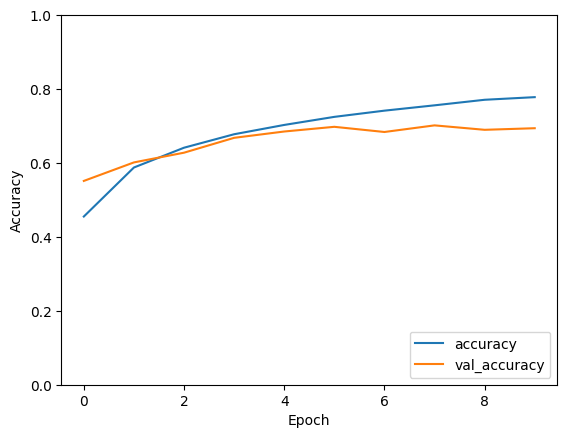

In [7]:
#Importación de bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

#Cargar y preprocesar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

#Construir la arquitectura de la CNN
model = models.Sequential([
   layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64, (3,3), activation='relu'),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(64, (3,3), activation='relu'),
   layers.Flatten(),
   layers.Dense(64, activation='relu'),
   layers.Dense(10)
])

#Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Entrenar modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images,test_labels))

#Visualizar resultados
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()